In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther233_93.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther37_110.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther228_91.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther92_145.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther40_113.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther196_69.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther159_45.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther129_24.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Alex Lawther182_63.jpg
/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Alex Lawther/Ale

# **Import Libraries**

In [1]:
!pip install timm
import torch
from torch import nn
from timm import create_model
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# **Prepare Dataset**

# **Class Distribution**

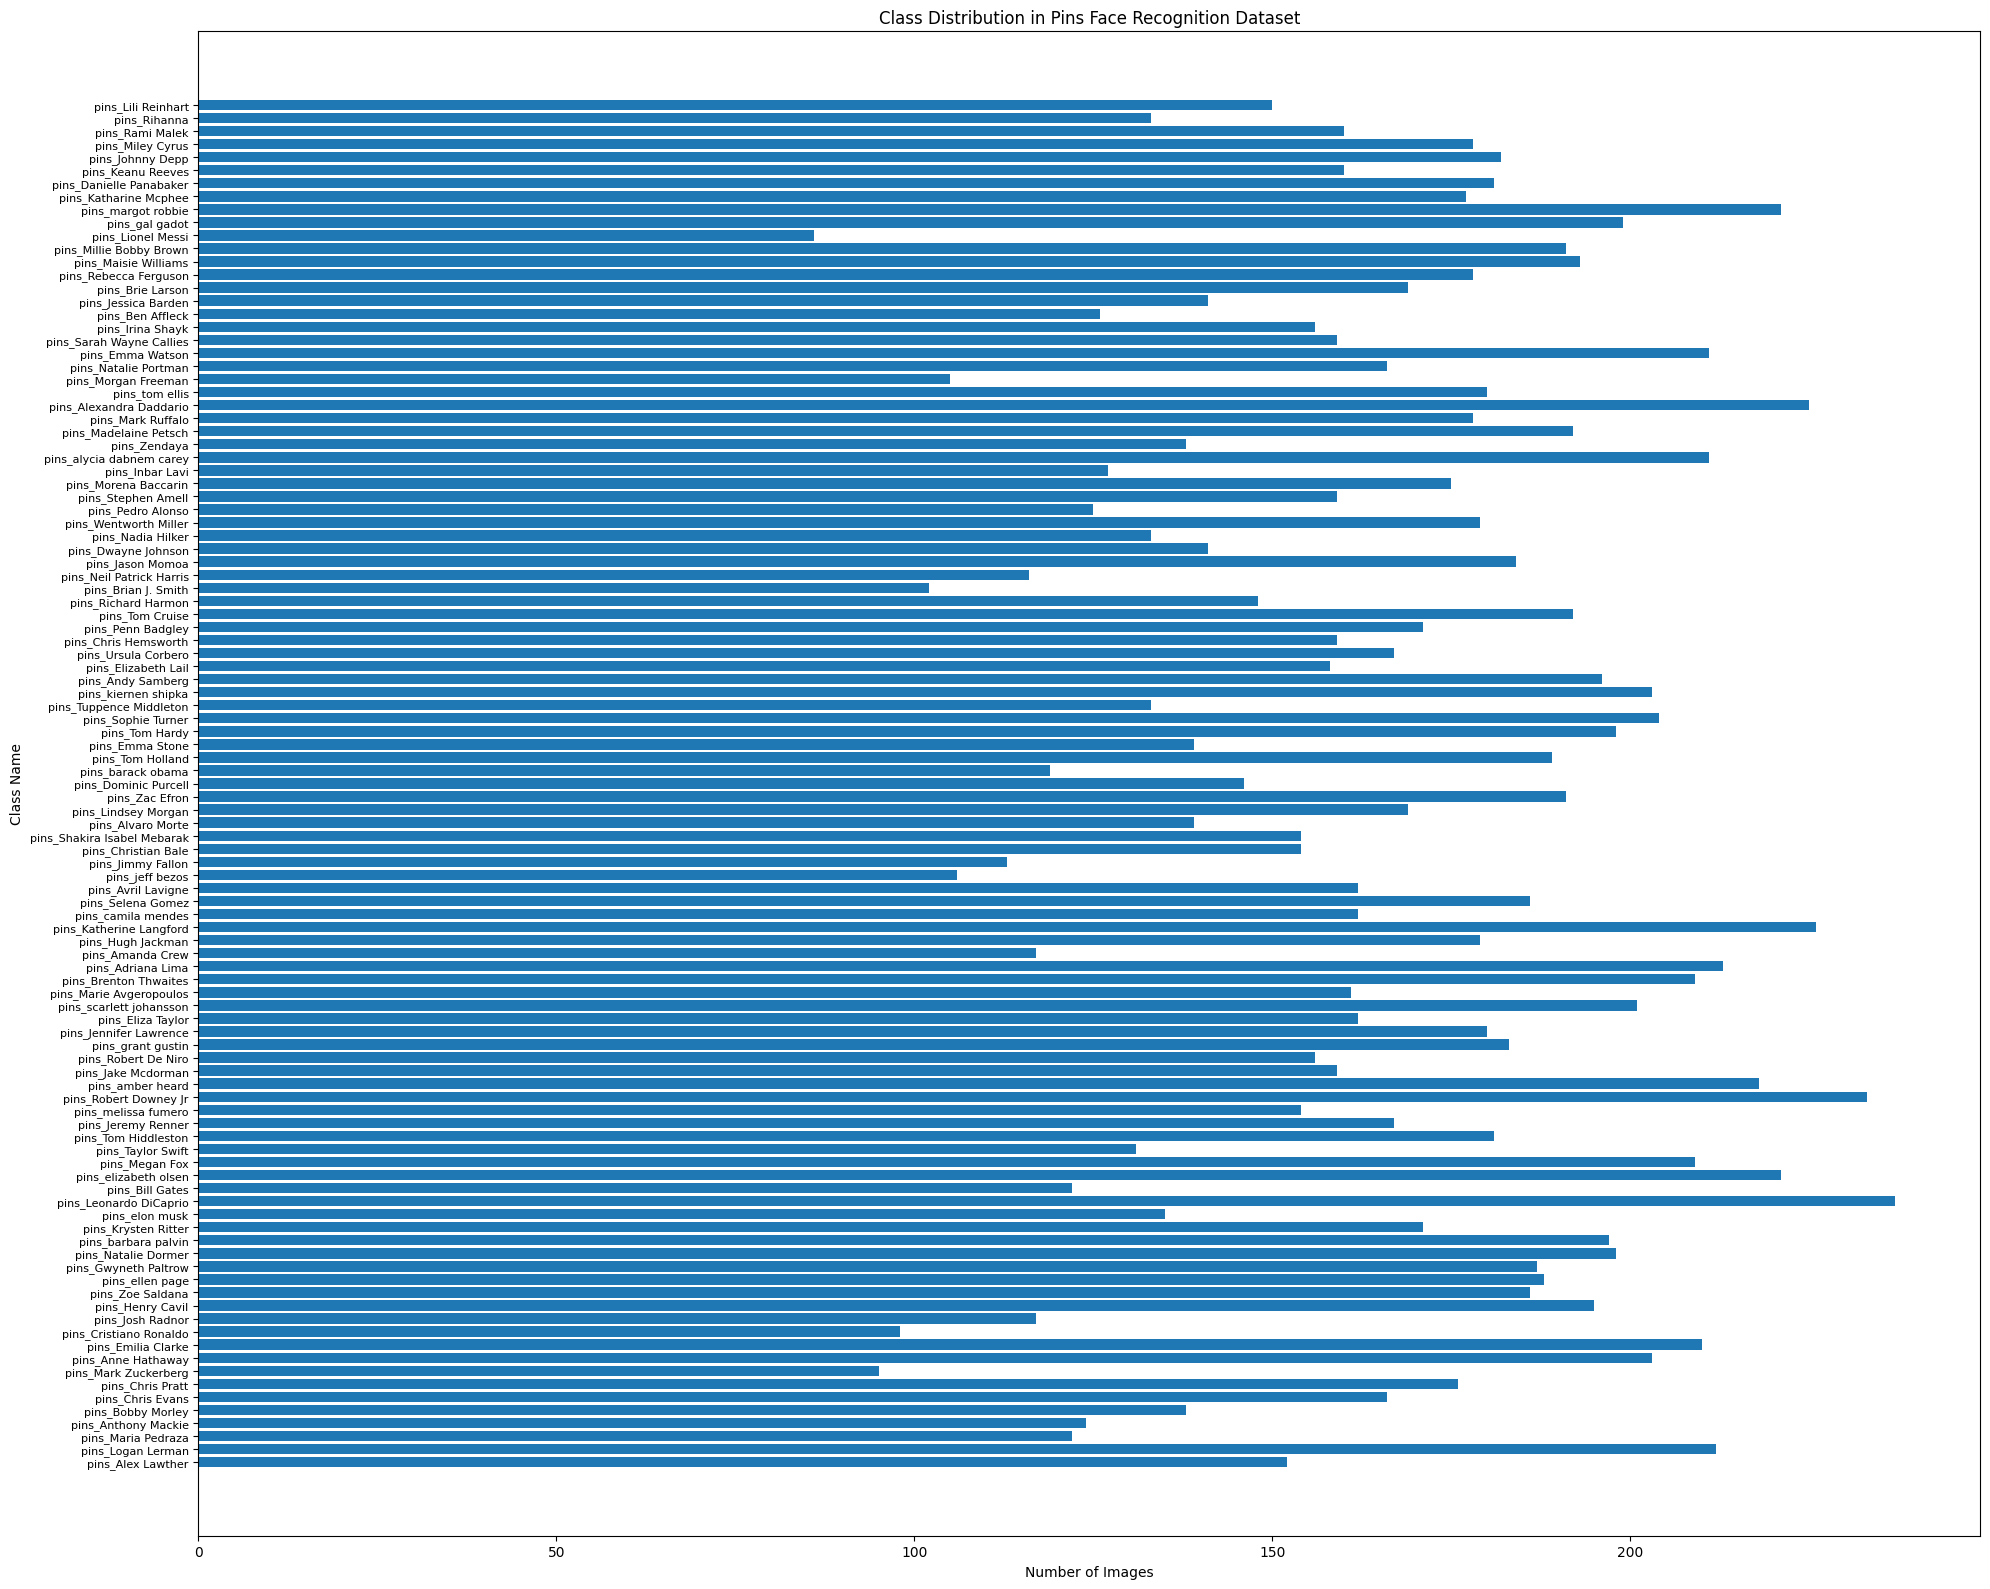

In [2]:
import os
import matplotlib.pyplot as plt

# Path to the extracted dataset folder
dataset_path = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset'

# Get all subfolders (representing classes)
class_names = os.listdir(dataset_path)

# Count the number of images in each class
class_counts = [len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in class_names]

# Plot the distribution
plt.figure(figsize=(20, 16))  # Increase the figure size for more space
plt.barh(class_names, class_counts)
plt.xlabel('Number of Images')
plt.ylabel('Class Name')
plt.title('Class Distribution in Pins Face Recognition Dataset')

# Adjust y-axis label spacing for better readability
plt.yticks(fontsize=8)  # Adjust font size for y-axis labels
plt.tight_layout()  # Ensure everything fits
plt.show()


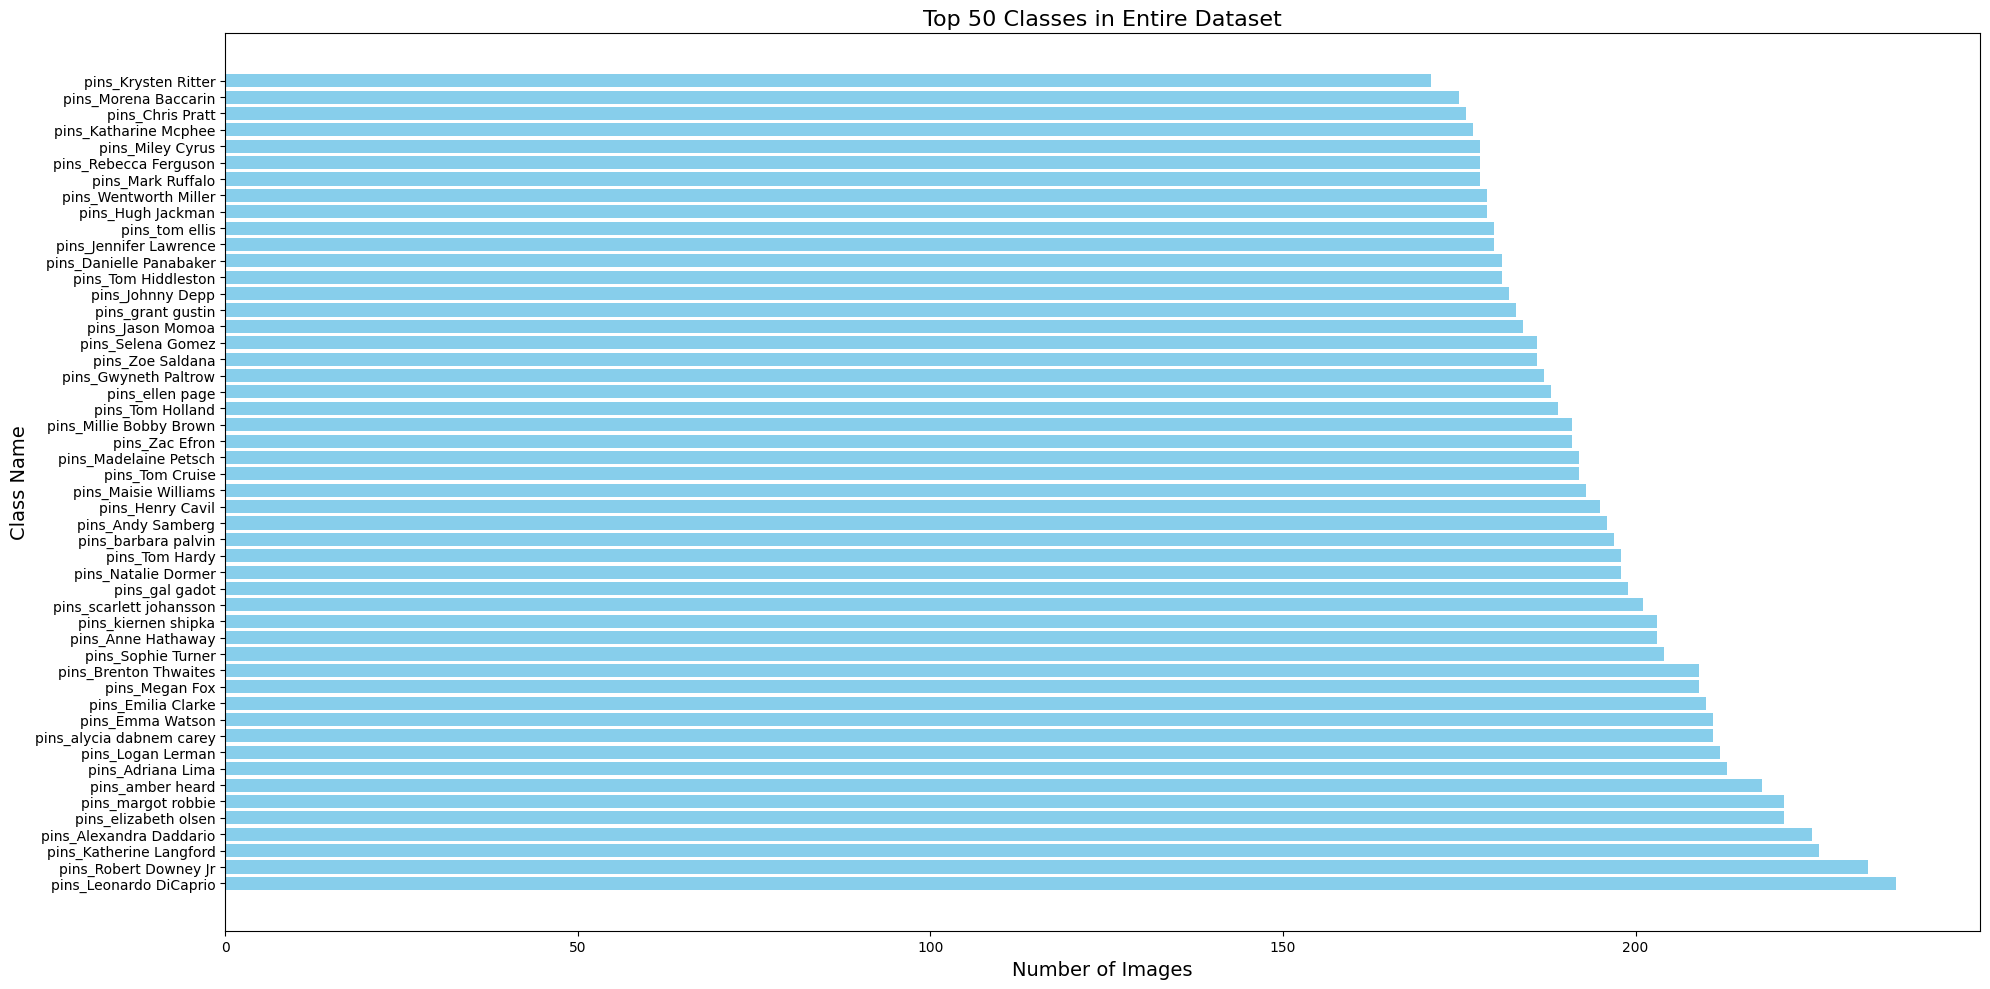

In [11]:
# Count the occurrences of each class in the entire dataset
label_counts = Counter(all_labels)

# Get class names and their counts
class_names = list(label_counts.keys())
class_counts = list(label_counts.values())

# Sort classes by the number of images (descending order)
sorted_indices = sorted(range(len(class_counts)), key=lambda i: class_counts[i], reverse=True)
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_class_counts = [class_counts[i] for i in sorted_indices]

# Select the top 50 classes
top_50_class_names = sorted_class_names[:50]
top_50_class_counts = sorted_class_counts[:50]

# Plot the distribution for the top 50 classes
plt.figure(figsize=(20, 10))  # Adjust figure size for better visibility
plt.barh(top_50_class_names, top_50_class_counts, color="skyblue")
plt.xlabel('Number of Images', fontsize=14)
plt.ylabel('Class Name', fontsize=14)
plt.title('Top 50 Classes in Entire Dataset', fontsize=16)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# **split the data into training and test data**

Number of training samples: 7758
Number of testing samples: 1985
Training Set Class Distribution:
Counter({'pins_Leonardo DiCaprio': 171, 'pins_Robert Downey Jr': 171, 'pins_Katherine Langford': 171, 'pins_Alexandra Daddario': 171, 'pins_elizabeth olsen': 171, 'pins_margot robbie': 171, 'pins_amber heard': 171, 'pins_Adriana Lima': 170, 'pins_Logan Lerman': 169, 'pins_alycia dabnem carey': 168, 'pins_Emma Watson': 168, 'pins_Emilia Clarke': 168, 'pins_Megan Fox': 167, 'pins_Brenton Thwaites': 167, 'pins_Sophie Turner': 163, 'pins_Anne Hathaway': 162, 'pins_kiernen shipka': 162, 'pins_scarlett johansson': 160, 'pins_gal gadot': 159, 'pins_Natalie Dormer': 158, 'pins_Tom Hardy': 158, 'pins_barbara palvin': 157, 'pins_Andy Samberg': 156, 'pins_Henry Cavil': 156, 'pins_Maisie Williams': 154, 'pins_Tom Cruise': 153, 'pins_Madelaine Petsch': 153, 'pins_Zac Efron': 152, 'pins_Millie Bobby Brown': 152, 'pins_Tom Holland': 151, 'pins_ellen page': 150, 'pins_Gwyneth Paltrow': 149, 'pins_Zoe Sald

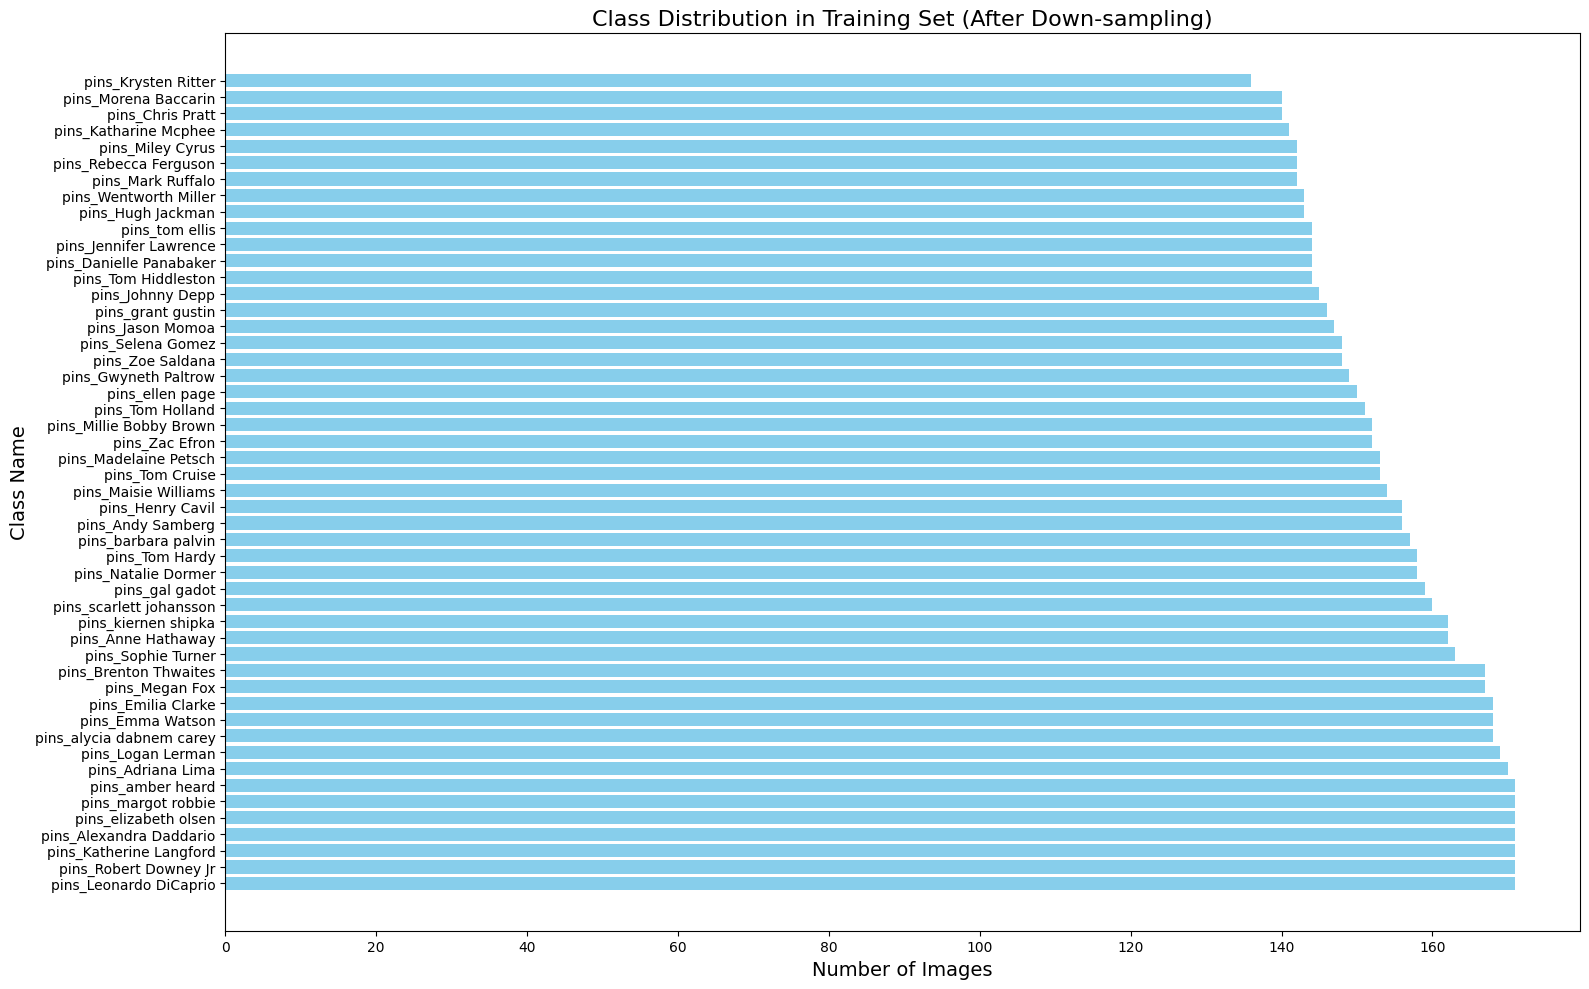

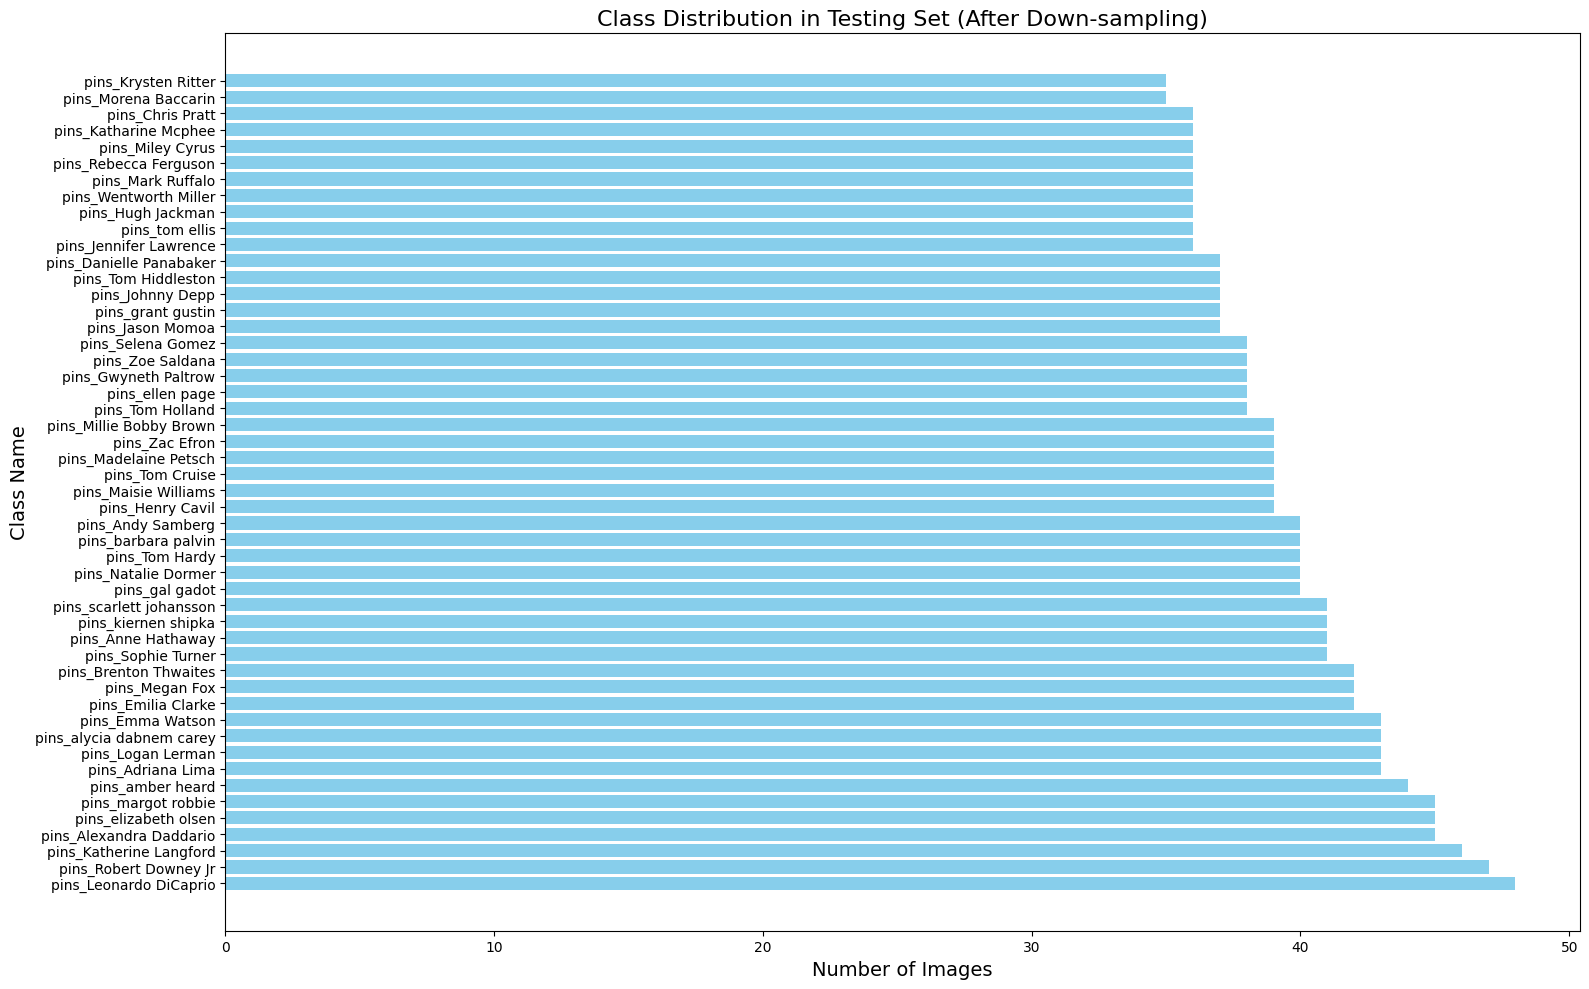

In [12]:
import os
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

# Count occurrences of each class
label_counts = Counter(all_labels)

# Get the top 50 classes
top_50_classes = [label for label, _ in label_counts.most_common(50)]

# Filter dataset for the top 50 classes
filtered_image_paths = [path for path, label in zip(all_image_paths, all_labels) if label in top_50_classes]
filtered_labels = [label for label in all_labels if label in top_50_classes]

# Count occurrences of each class in the filtered dataset
filtered_label_counts = Counter(filtered_labels)

# Find the minimum sample size for down-sampling
min_samples_per_class = min(filtered_label_counts.values())

# Create train-test split for each class and down-sample
train_paths, train_labels = [], []
test_paths, test_labels = [], []

for class_name in top_50_classes:
    # Get all images and labels for the current class
    class_paths = [path for path, label in zip(filtered_image_paths, filtered_labels) if label == class_name]
    class_labels = [label for label in filtered_labels if label == class_name]
    
    # Stratified train-test split for the current class
    class_train_paths, class_test_paths, class_train_labels, class_test_labels = train_test_split(
        class_paths, class_labels, test_size=0.2, random_state=42
    )
    
    # Down-sample the training and testing sets
    train_paths.extend(class_train_paths[:min_samples_per_class])
    train_labels.extend(class_train_labels[:min_samples_per_class])
    test_paths.extend(class_test_paths[:min_samples_per_class])
    test_labels.extend(class_test_labels[:min_samples_per_class])

# Verify results
print(f"Number of training samples: {len(train_paths)}")
print(f"Number of testing samples: {len(test_paths)}")

# Distribution of samples in training and testing sets
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

print("Training Set Class Distribution:")
print(train_label_counts)

print("Testing Set Class Distribution:")
print(test_label_counts)

# Plot the distribution of classes in the training and testing sets
def plot_class_distribution(label_counts, title):
    class_names = list(label_counts.keys())
    class_counts = list(label_counts.values())
    
    plt.figure(figsize=(16, 10))
    plt.barh(class_names, class_counts, color='skyblue')
    plt.xlabel('Number of Images', fontsize=14)
    plt.ylabel('Class Name', fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_label_counts, "Class Distribution in Training Set (After Down-sampling)")
plot_class_distribution(test_label_counts, "Class Distribution in Testing Set (After Down-sampling)")


# **Data Generators**

In [26]:
# Define image data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocess for Xception
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Preprocess for Xception
)

# Create TensorFlow data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_paths, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(299, 299),  # Xception input size
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': test_paths, 'class': test_labels}),
    x_col='filename',
    y_col='class',
    target_size=(299, 299),  # Xception input size
    batch_size=64,
    class_mode='categorical',
    shuffle=False  

    
)


Found 7758 validated image filenames belonging to 50 classes.
Found 1985 validated image filenames belonging to 50 classes.


# **Load Xception**

In [14]:
# Load Xception model without top layers
base_model = tf.keras.applications.Xception(
    weights='imagenet', include_top=False, input_shape=(299, 299, 3)
)
# Assuming 'model' is your Keras model
print(f"Number of layers in the model: {len(base_model.layers)}")

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of layers in the model: 132


# ***Transfer Learning***

# **Initial Setup and Freezing the Base Model**

In [15]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()

print(f"Number of devices: {strategy.num_replicas_in_sync}")

# Open a strategy scope.
with strategy.scope():
    # Load Xception model without top layers
    base_model = tf.keras.applications.Xception(
        weights='imagenet', include_top=False, input_shape=(299, 299, 3)
    )
    
    # Freeze the base model to keep the pre-trained weights fixed during initial training
    base_model.trainable = False
    
    # Add custom layers on top of Xception
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(299, 299, 3)),  # Input layer
        base_model,  # Xception base model
        layers.GlobalAveragePooling2D(),  # Global pooling layer
        layers.Dense(512, activation='relu'),  # Custom dense layer
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer (number of classes)
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
model.summary()
# Assuming 'model' is your Keras model
print(f"Number of layers in the model: {len(model.layers)}")


Number of devices: 2


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,936,218 (83.68 MB)

 Trainable params: 1,074,738 (4.10 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Number of layers in the model: 5


# **Train the Model with Frozen Base Layers**

In [16]:
# Assuming `strategy` is already defined
with strategy.scope():
    # Fine-tune the model with both the custom layers and the unfrozen Xception layers
    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=5
    )
model.summary()


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.0484 - loss: 3.7916 - val_accuracy: 0.1198 - val_loss: 3.2452
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.0888 - loss: 3.3527 - val_accuracy: 0.1551 - val_loss: 3.0826
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.1292 - loss: 3.1682 - val_accuracy: 0.1782 - val_loss: 2.9770
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.1626 - loss: 3.0531 - val_accuracy: 0.2004 - val_loss: 2.8654
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.1709 - loss: 2.9618 - val_accuracy: 0.2216 - val_loss: 2.8259


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,085,696 (91.88 MB)

 Trainable params: 1,074,738 (4.10 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 2,149,478 (8.20 MB)

# **Plot The Result**

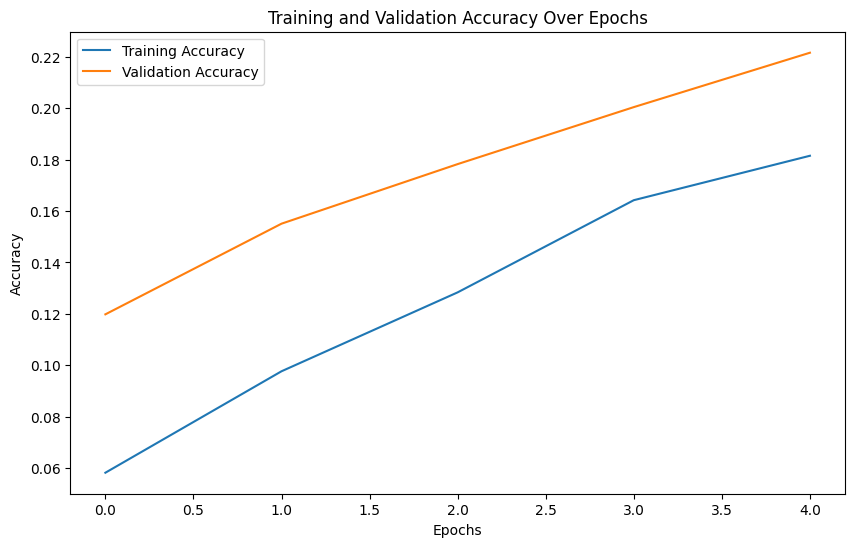

In [18]:
# Extract training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

# Add labels and title
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


# **Apply Early Stopping && Unfreeze Deeper Layers and Fine-Tune (100 layer)**

In [19]:
# Assuming `strategy` is already defined
with strategy.scope():
    # Unfreeze the last few layers of the base model
    base_model.trainable = True

    # Freeze the first 100 layers of Xception and unfreeze the rest
    for layer in base_model.layers[:100]:
        layer.trainable = False
    
    # Recompile the model after unfreezing layers (important step)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Use a smaller learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    #Patience: You specify a "patience" value, which is the number of epochs to wait for improvement before stopping. If the validation metric doesn't improve for that many epochs, training stops.
    #Restore Best Weights: Optionally, the model can revert to the weights that achieved the best performance on the validation set.

    # Fine-tune the model with both the custom layers and the unfrozen Xception layers
    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=150, # Max number of epochs
        callbacks=[early_stopping] # Include the callback here
    )
model.summary()


Epoch 1/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.1072 - loss: 3.4264 - val_accuracy: 0.2548 - val_loss: 2.6993
Epoch 2/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.1488 - loss: 3.0546 - val_accuracy: 0.2659 - val_loss: 2.6470
Epoch 3/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.2050 - loss: 2.8825 - val_accuracy: 0.2739 - val_loss: 2.6292
Epoch 4/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.2163 - loss: 2.7886 - val_accuracy: 0.3082 - val_loss: 2.5282
Epoch 5/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.2416 - loss: 2.6800 - val_accuracy: 0.3343 - val_loss: 2.4441
Epoch 6/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.2477 - loss: 2.6337 - val_accuracy: 0.3333 - val_loss: 2.3967
Epoch 7/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.2710 - loss: 2.5338 - val_accuracy: 0.3343 - val_loss: 2.3503
Epoch 8/150
122/122 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.2926 - loss: 2.4763 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,042,384 (164.19 MB)

 Trainable params: 10,553,082 (40.26 MB)

 Non-trainable params: 11,383,136 (43.42 MB)

 Optimizer params: 21,106,166 (80.51 MB)

# **Plot after Transfer Learning**

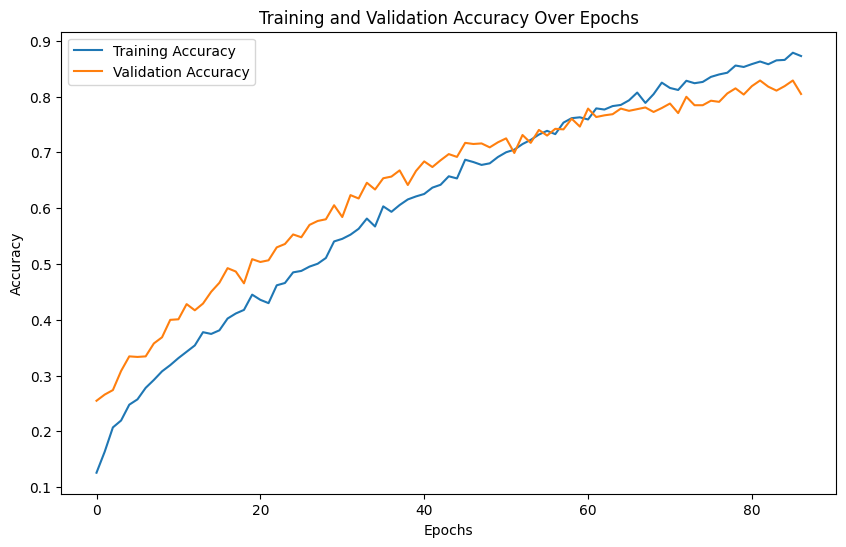

In [20]:
# Extract training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

# Add labels and title
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


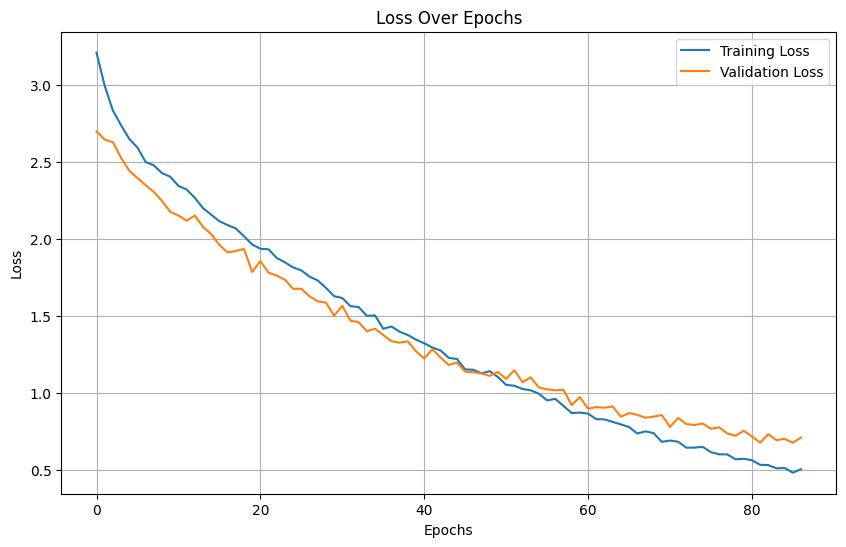

In [32]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# **evaluate The Result**

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 390ms/step - accuracy: 0.8189 - loss: nan  
Test Loss: 0.754257082939148
Test Accuracy: 0.8036254048347473


In [22]:
# Print training accuracy for each epoch
train_acc = history.history['accuracy']
print("Training Accuracy per Epoch:", train_acc)

# Print the final training accuracy
print(f"Final Training Accuracy: {train_acc[-1]}")


Training Accuracy per Epoch: [0.12580561637878418, 0.16344419121742249, 0.2070121169090271, 0.21938644349575043, 0.24774426221847534, 0.2572827935218811, 0.2779066860675812, 0.29208558797836304, 0.3075534999370575, 0.3186388313770294, 0.3312709331512451, 0.342614084482193, 0.3539572060108185, 0.3776746690273285, 0.37458106875419617, 0.381026029586792, 0.4021655023097992, 0.4111884534358978, 0.41763341426849365, 0.4449600279331207, 0.43567928671836853, 0.4297499358654022, 0.4617169499397278, 0.46584171056747437, 0.4849188029766083, 0.4874967634677887, 0.4952307343482971, 0.5003867149353027, 0.5106986165046692, 0.5403454303741455, 0.544985830783844, 0.5524619817733765, 0.5630317330360413, 0.5813354253768921, 0.5671564936637878, 0.6032482385635376, 0.5934519171714783, 0.6055684685707092, 0.6156225800514221, 0.6210363507270813, 0.6254189014434814, 0.6367620229721069, 0.6419180035591125, 0.6571281552314758, 0.653261125087738, 0.6867749691009521, 0.6826501488685608, 0.6774942278862, 0.680329

# <center>------------------------------------------------------------------------</center>

# **Evaluation Metric Decisions**

There is one final question to consider before building a model: what do we mean by accuracy? What constitutes a successful model?

Accuracy is defined as 
<center>$$acc = \frac{tp + tn}{n}$$</center>

Where tp is the number of true positive predictions, tn is the number of true negative predictions, and n is the total number of predictions. In other words, it is the proportion of all predictions that are correct. Accuracy is a useful indicator that our model performs well, but ignores the nuance that false positives and false negatives may have different costs associated with them. It also performs badly when there is a large class imbalance, which is a key consideration in the LFW dataset.
In the following models, we consider two key metrics: precision and recall. The precision of a model for predicted class x is defined as

$$prec_x = \frac{tp_x}{tp_x + fp_x}$$

Where fpx is the number of false positive predictions for class x. In other words, precision represents the proportion of all images that are predicted to be in class x that actually belong to class x. The recall of a model for predicted class x is defined as

$$rec_x = \frac{tp_x}{tp_x + fn_x}$$

Where fnx is the number of false negative predictions for class x. Recall indicates the proportion of all images that are actually in class x that are predicted to be in class x. It is also possible to combine precision and recall into an F1 score, but for the purposes of this notebook it is interesting to consider the real-world implications of the separate metrics.

Which of these metrics is likely to be more useful? A key consideration here is what this algorithm is likely to be used for in the real world, and the implications of different errors. Precision is useful when the cost of false positives is high. A classic example is in disease detection algorithms, where a false positive could lead to expensive further tests and emotional trauma for the recipient. On the other hand, recall is useful when the cost of false negatives is high. For example, if we were sifting through CCTV images to spot a wanted criminal and a model ignored an image where the criminal was present, this would constitute a fundamental problem with the model. In our setting, where image recognition is being utilized in the entertainment sphere, the key outputs are likely to be in image labelling for news services and video annotation for live broadcast. Both services are primarily interested in making sure any allocated labels are correct - missing labels are less problematic than incorrect labels, especially for building public trust in the system and avoiding embarrassing errors, so the cost of false positives is likely to be higher. Thus, while we still consider recall for each predicted class, we primarily focus on precision in our model results.

# **Evaluation Metrics**

# **Confusion Matrix && Classification Report**

In [27]:
# Get predictions and true labels
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Predicted class indices
y_true = test_generator.classes           # True class indices

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)




/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step
                          precision    recall  f1-score   support

       pins_Adriana Lima       0.91      0.95      0.93        43
 pins_Alexandra Daddario       0.95      0.91      0.93        45
       pins_Andy Samberg       0.76      0.88      0.81        40
      pins_Anne Hathaway       0.89      0.78      0.83        41
   pins_Brenton Thwaites       0.84      0.76      0.80        42
        pins_Chris Pratt       0.80      0.92      0.86        36
 pins_Danielle Panabaker       0.80      0.65      0.72        37
      pins_Emilia Clarke       0.63      0.57      0.60        42
        pins_Emma Watson       0.74      0.72      0.73        43
    pins_Gwyneth Paltrow       0.86      0.84      0.85        38
        pins_Henry Cavil       0.81      0.77      0.79        39
       pins_Hugh Jackman       0.78      0.86      0.82        36
        pins_Jason Momoa       0.97      0.86      0.91        37
  pins_Jennifer Lawrence       0.

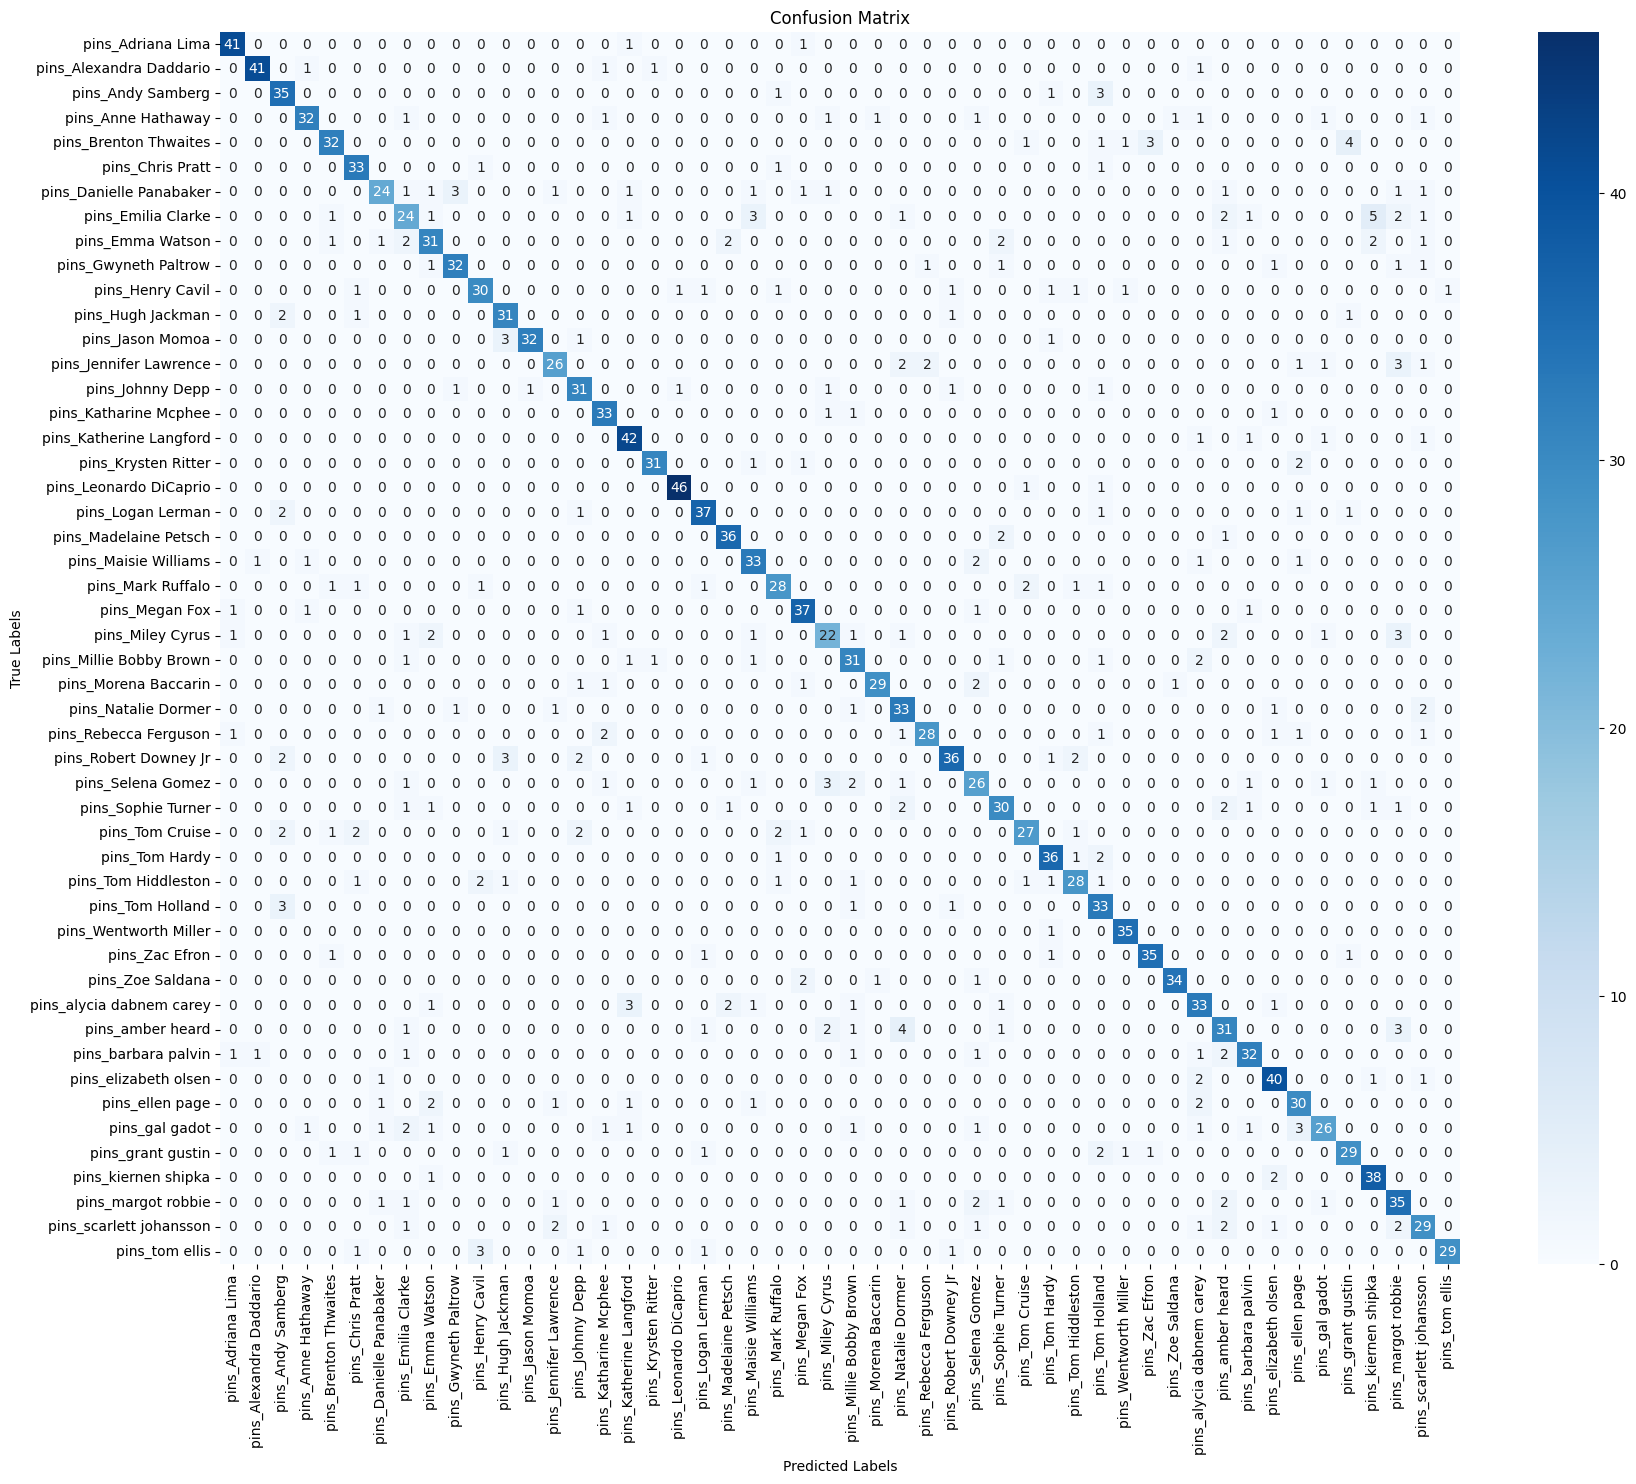

In [28]:
plt.figure(figsize=(20, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **ROC & AUC**

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step


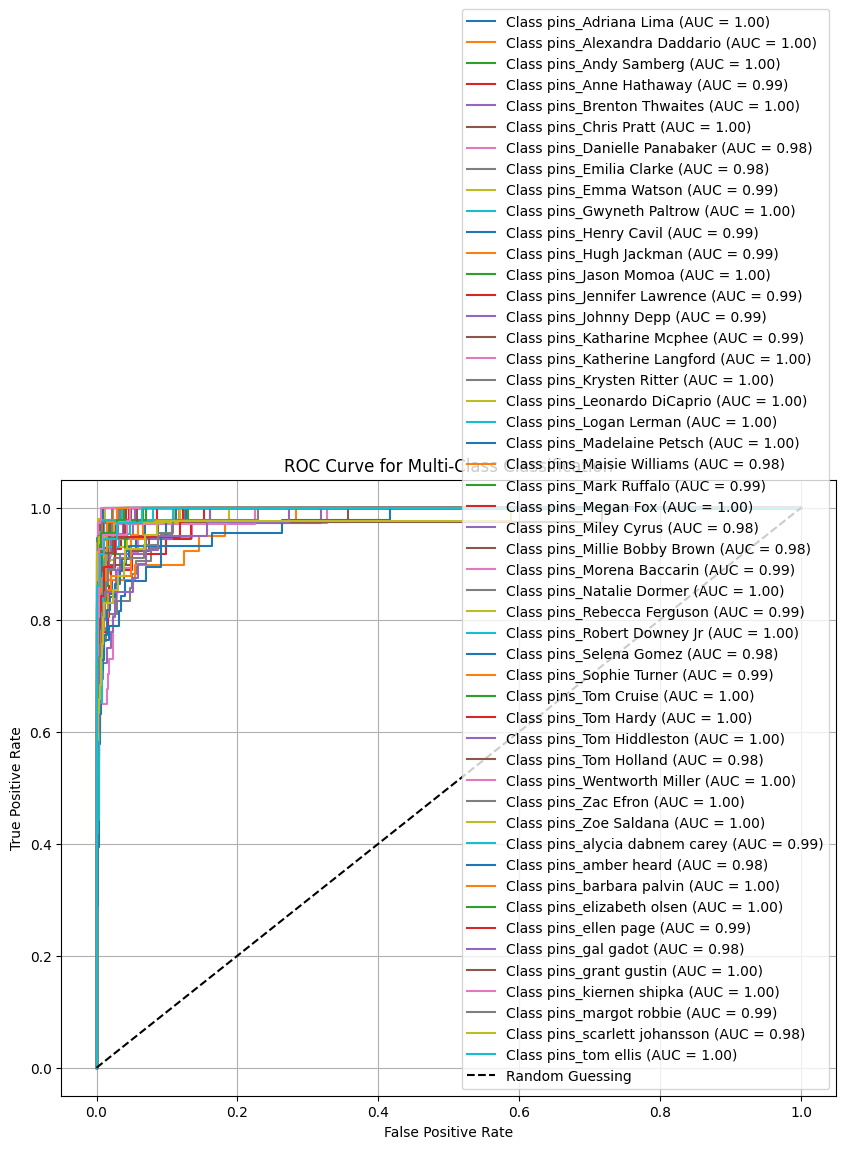

Micro-Averaged AUC: 0.99
Macro-Averaged AUC: 0.99


In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
predictions = model.predict(test_generator)

# One-hot encode the true labels
y_true_one_hot = label_binarize(y_true, classes=np.arange(len(class_labels)))

# Initialize variables for ROC and AUC
fpr = {}  # False positive rate
tpr = {}  # True positive rate
roc_auc = {}  # AUC for each class

# Compute ROC curve and AUC for each class
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Customize the plot
plt.title('ROC Curve for Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calculate and print macro- and micro-averaged AUC
fpr_micro, tpr_micro, _ = roc_curve(y_true_one_hot.ravel(), predictions.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print(f"Micro-Averaged AUC: {roc_auc_micro:.2f}")

fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(len(class_labels))]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(len(class_labels)):
    tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= len(class_labels)
roc_auc_macro = auc(fpr_macro, tpr_macro)
print(f"Macro-Averaged AUC: {roc_auc_macro:.2f}")


# **Testing**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted Class Index: 18
Predicted Class Name: pins_Leonardo DiCaprio


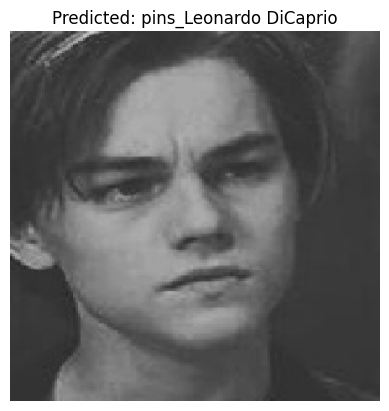

In [34]:
# Load and preprocess a sample image
img_path = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Leonardo DiCaprio/Leonardo DiCaprio172_2533.jpg'

# Load the image with the target size of 299x299
img = load_img(img_path, target_size=(299, 299))  # Resize to match model input size
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Get the mapping of class indices to class names
class_indices = train_generator.class_indices  # Assuming the train_generator was used in training
class_names = {v: k for k, v in class_indices.items()}  # Reverse the dictionary

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]


# Print the predicted class number and name
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Name: {predicted_class_name}")

# Display the image with the predicted class name
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted Class Index: 23
Predicted Class Name: pins_Megan Fox


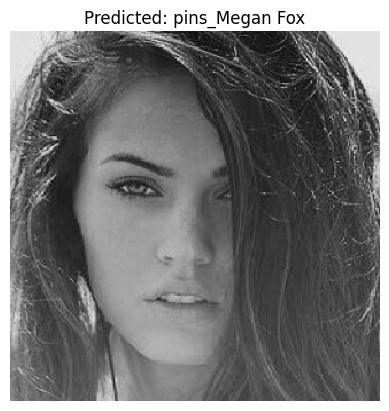

In [35]:
# Load and preprocess a sample image
img_path = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset/pins_Megan Fox/Megan Fox110_3376.jpg'

# Load the image with the target size of 299x299
img = load_img(img_path, target_size=(299, 299))  # Resize to match model input size
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Get the mapping of class indices to class names
class_indices = train_generator.class_indices  # Assuming the train_generator was used in training
class_names = {v: k for k, v in class_indices.items()}  # Reverse the dictionary

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_index]


# Print the predicted class number and name
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Name: {predicted_class_name}")

# Display the image with the predicted class name
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()